In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

%matplotlib inline
plt.style.use('fivethirtyeight')
df = pd.read_csv('https://raw.githubusercontent.com/datasets/covid-19/master/data/countries-aggregated.csv' , parse_dates = ['Date'])
df.head()

,Date,Country,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,0,0,0
1,2020-01-23,Afghanistan,0,0,0
2,2020-01-24,Afghanistan,0,0,0
3,2020-01-25,Afghanistan,0,0,0
4,2020-01-26,Afghanistan,0,0,0


In [34]:
df['Total Cases'] = df[['Confirmed','Recovered','Deaths']].sum(axis = 1)
df.head()

,Date,Country,Confirmed,Recovered,Deaths,Total Cases
0,2020-01-22,Afghanistan,0,0,0,0
1,2020-01-23,Afghanistan,0,0,0,0
2,2020-01-24,Afghanistan,0,0,0,0
3,2020-01-25,Afghanistan,0,0,0,0
4,2020-01-26,Afghanistan,0,0,0,0


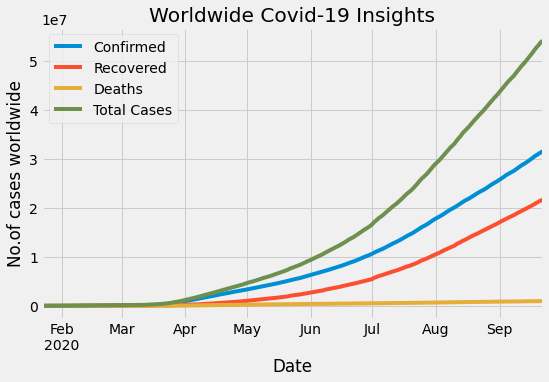

In [35]:
#Worldwide cases
worldwide_df = df.groupby(['Date']).sum()
w = worldwide_df.plot(figsize = (8,5))
w.set_xlabel('Date')
w.set_ylabel('No.of cases worldwide')
w.title.set_text('Worldwide Covid-19 Insights')
plt.show()

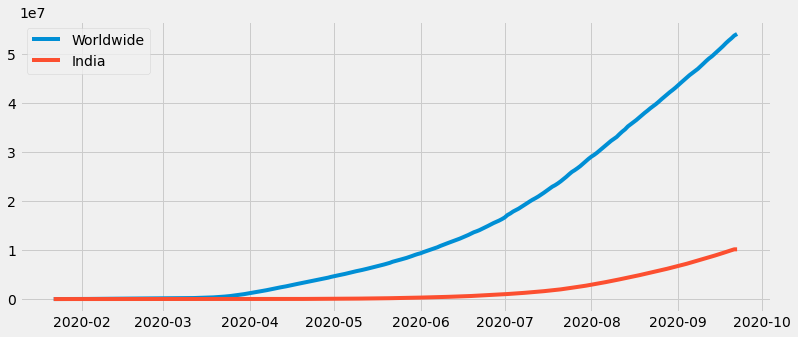

In [36]:
#India vs. Worldwide cases
india_df = df[df['Country'] == 'India'].groupby(['Date']).sum()

fig = plt.figure(figsize = (12,5))
ax = fig.add_subplot(111)

ax.plot(worldwide_df[['Total Cases']], label='Worldwide')
ax.plot(india_df[['Total Cases']], label='India')
w.set_xlabel('Date')
w.set_ylabel('No.of cases worldwide')
w.title.set_text('Worldwide vs. India Total Cases')
plt.legend(loc = 'upper left')
plt.show()

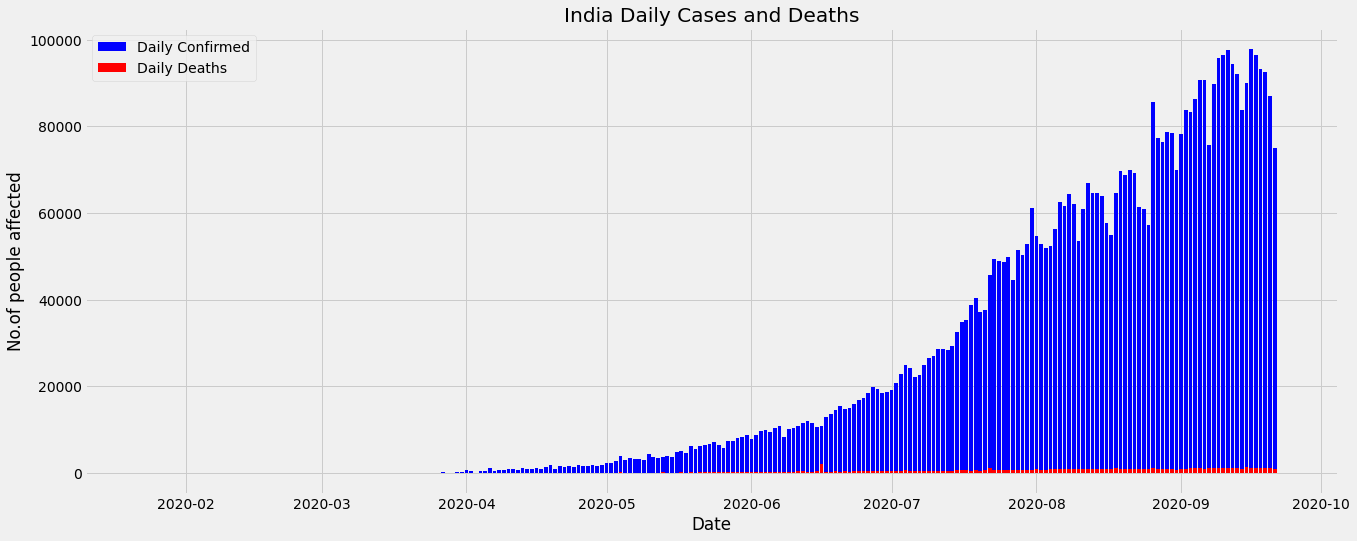

In [37]:
#India Daily cases and deaths
india_df = india_df.reset_index()
india_df['Daily Confirmed'] = india_df['Confirmed'].sub(india_df['Confirmed'].shift())
india_df['Daily Deaths'] = india_df['Deaths'].sub(india_df['Deaths'].shift())

fig = plt.figure(figsize = (20,8))
ax = fig.add_subplot(111)

ax.bar(india_df['Date'], india_df['Daily Confirmed'], color='b', label='Daily Confirmed')
ax.bar(india_df['Date'], india_df['Daily Deaths'], color='r', label='Daily Deaths')
ax.set_xlabel('Date')
ax.set_ylabel('No.of people affected')
ax.title.set_text('India Daily Cases and Deaths')

plt.legend(loc = 'upper left')
plt.show()

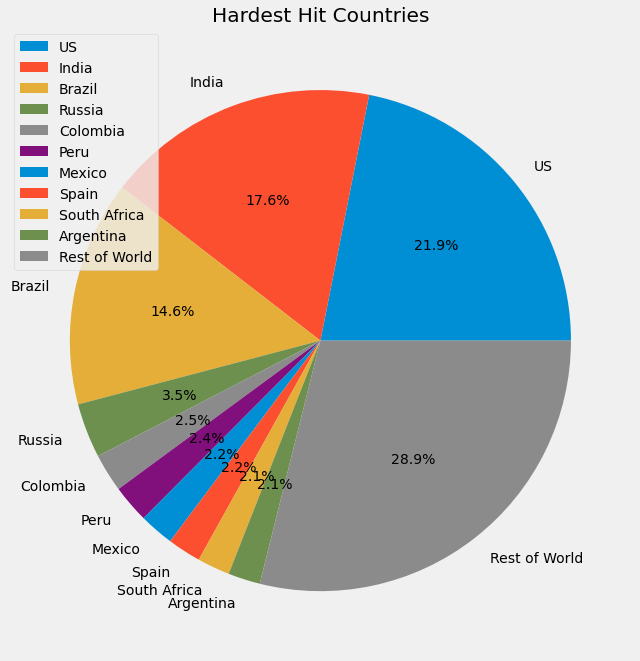

In [84]:
#Top 10 worst hit countries
from datetime import date, timedelta
yesterday = date.today() - timedelta(days=1)
y = yesterday.strftime('%Y-%m-%d')

today_df = df[df['Date'] == y]
top_10 = today_df.sort_values(['Confirmed'], ascending = False)[:10]
top_10.loc['rest-of-world'] = today_df.sort_values(['Confirmed'], ascending = False)[10:].sum()
top_10.loc['rest-of-world', 'Country'] = 'Rest of World'

fig = plt.figure(figsize = (10,20))
ax = fig.add_subplot(111)

ax.pie(top_10['Confirmed'], labels= top_10['Country'], autopct='%1.1f%%')
ax.title.set_text('Hardest Hit Countries')

plt.legend(loc = 'upper left')
plt.show()
